In [1]:
import ROOT as r
import uproot
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.colors as colors
import array as arr

Welcome to JupyROOT 6.30/02


In [22]:
f_norm = r.TFile.Open('../fcl/caf/test2.Unblind.DONOTLOOK.flat.caf.root')
f_mod = r.TFile.Open('../fcl/caf/test_mod2.Unblind.DONOTLOOK.flat.caf.root')
f_mod2 = r.TFile.Open('../fcl/caf/test_chargeWeight.Unblind.DONOTLOOK.flat.caf.root')

In [83]:
# t_norm = uproot.open('srcs/icaruscode/fcl/caf/test2.Unblind.DONOTLOOK.flat.caf.root:recTree')
#t_mod = uproot.open('srcs/icaruscode/fcl/caf/test_mod2.Unblind.DONOTLOOK.flat.caf.root:recTree')
# t_mod2 = uproot.open('srcs/icaruscode/fcl/caf/test_chargeWeight.Unblind.DONOTLOOK.flat.caf.root:recTree')

#data
# t_raw = uproot.open('srcs/icaruscode/fcl/caf/test_noNorm.Unblind.DONOTLOOK.flat.caf.root:recTree')
# t_mod = uproot.open('srcs/icaruscode/fcl/caf/test_trajNorm.Unblind.DONOTLOOK.flat.caf.root:recTree')
# t_mod2 = uproot.open('srcs/icaruscode/fcl/caf/test_uniNorm.Unblind.DONOTLOOK.flat.caf.root:recTree')
# t_norm = uproot.open('srcs/icaruscode/fcl/caf/test_allNorm.Unblind.DONOTLOOK.flat.caf.root:recTree')

#MC
# t_raw = uproot.open('/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/srcs/icaruscode/fcl/caf/stage1_mc_noNorm.flat.caf.root:recTree')
# t_mod = uproot.open('/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/srcs/icaruscode/fcl/caf/stage1_mc_trajNorm.flat.caf.root:recTree')
# t_mod2 = uproot.open('/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/srcs/icaruscode/fcl/caf/stage1_mc_uniNorm.flat.caf.root:recTree')
# t_norm = uproot.open('/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/srcs/icaruscode/fcl/caf/stage1_mc_allNorm.flat.caf.root:recTree')

t_raw = uproot.open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/testNoNorm.flat.caf.root:recTree")
t_mod = uproot.open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/testTrajNorm.flat.caf.root:recTree")
t_mod2 = uproot.open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/testUniNorm.flat.caf.root:recTree")
t_norm = uproot.open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/testFullNorm.flat.caf.root:recTree")


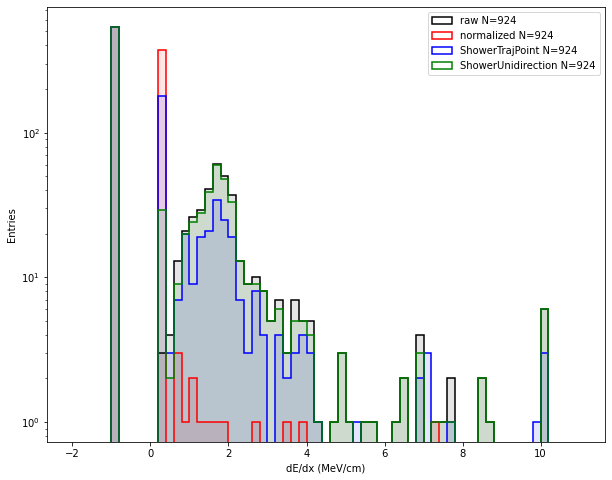

In [84]:
plt.figure(figsize=(10,8))

bins = 65
range = (-2, 11)

#var = 'rec.slc.reco.pfp.shw.bestplane'
var = 'rec.slc.reco.pfp.shw.plane.2.dEdx'

trees = [t_raw, t_norm, t_mod, t_mod2]
arrays = []

for t in trees:
    a = t[var].array()
    sel = (t['rec.slc.reco.pfp.shw.plane.2.energy'].array() > 0.00)
    #sel = (np.abs(t['rec.slc.reco.pfp.trk.truth.p.pdg'].array()) == 11)  # select electrons and positrons
    #sel = (t['rec.slc.reco.pfp.shw.plane.2.energy'].array() > 0.00)
    #sel = sel & (t['rec.slc.reco.pfp.trackScore'].array() > 0.5)
    a = a[sel] # cut on energy
    a = ak.to_numpy(ak.flatten(a))
    arrays.append(a)


colors = ['black', 'red', 'blue', 'green']
labels = ['raw', 'normalized', 'ShowerTrajPoint', 'ShowerUnidirection']
for i, a in enumerate(arrays):
    #if i != 1 and i!= 0: continue
    a[a > 10] = 10  # overflow
    a[a < 0] = -1  # underflow
    plt.hist(a, bins=bins, range=range, histtype='step', alpha=1, color=colors[i], edgecolor=colors[i], linewidth=1.5, label=f'{labels[i]} N={len(a)}')
    plt.hist(a, bins=bins, range=range, histtype='stepfilled', alpha=0.1, color=colors[i], edgecolor=colors[i], linewidth=1.5)


plt.ylabel("Entries")
plt.xlabel("dE/dx (MeV/cm)")
plt.legend()
plt.yscale('log')

In [85]:
plt.figure(figsize=(10, 8))

# Use the arrays from the previous cell
x_data = arrays[0]  # t_raw data
y_data = arrays[1]  # t_norm data

# Create 2D histogram with log scale colorbar
plt.hist2d(x_data, y_data, bins=55, range=[[-1, 10], [-1, 10]], 
           cmap='viridis', norm=colors.LogNorm())
plt.colorbar(label='Counts (log scale)')

plt.xlabel('Raw dE/dx (MeV/cm)')
plt.ylabel('Normalized dE/dx (MeV/cm)')
plt.title('2D Histogram: Raw vs Normalized dE/dx')

# Add diagonal line for reference
plt.plot([-1, 10], [-1, 10], 'r--', alpha=0.7, label='y=x')
plt.legend()


AttributeError: 'list' object has no attribute 'LogNorm'

<Figure size 720x576 with 0 Axes>

In [86]:
df = pd.DataFrame({
    'Raw': arrays[0],
    'Normalized': arrays[1],
    'TrajNorm': arrays[2],
    'UniNorm': arrays[3]
})
df_filtered = df[(df['Raw'] != df['Normalized']) | 
                 (df['Raw'] != df['TrajNorm']) | 
                 (df['Raw'] != df['UniNorm']) |
                 (df['Normalized'] != df['TrajNorm']) |
                 (df['Normalized'] != df['UniNorm']) |
                 (df['TrajNorm'] != df['UniNorm'])]
df = df_filtered
df.head(20)

,Raw,Normalized,TrajNorm,UniNorm
3,10.000000,0.322974,0.322974,10.000000
4,2.434480,0.322974,0.322974,2.434480
5,2.078470,0.322974,0.322974,2.078470
6,2.068612,0.322974,2.068612,0.322974
7,2.041513,0.322974,0.322974,2.041513
9,2.788839,0.322974,0.322974,2.788839
13,2.421430,0.322974,0.322974,2.421430
14,0.675644,0.322974,0.322974,0.675644
17,8.705301,0.322974,0.322974,8.705301
18,1.911020,0.322974,0.322974,1.911020


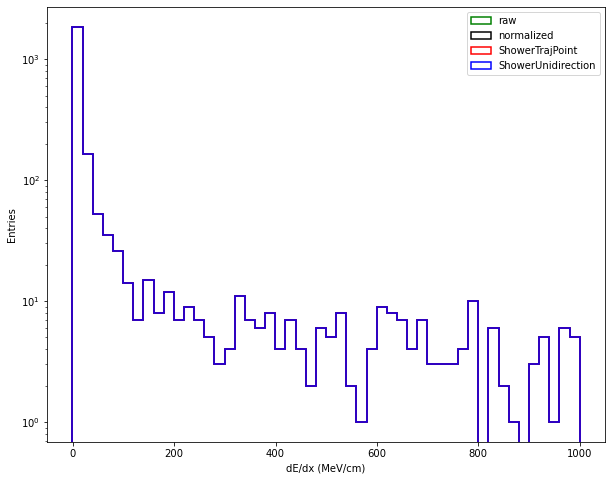

In [183]:
plt.figure(figsize=(10,8))

bins = 50
range = (-1, 1000)

#var = 'rec.slc.reco.pfp.shw.bestplane_dEdx'
var = 'rec.slc.reco.pfp.shw.bestplane_energy'

#sel = 

data_raw = ak.to_numpy(ak.flatten(t_raw[var].array())) * 1000
data_norm = ak.to_numpy(ak.flatten(t_norm[var].array())) * 1000
data_mod = ak.to_numpy(ak.flatten(t_mod[var].array())) * 1000
data_mod2 = ak.to_numpy(ak.flatten(t_mod2[var].array())) * 1000
# data_raw[data_raw > range[1]] = range[1]  # Assign inf values to the last bin
# data_norm[data_norm > range[1]] = range[1]  # Assign inf values to the last bin
# data_mod[data_mod > range[1]] = range[1]  # Assign inf values to the last bin
# data_mod2[data_mod2 > range[1]] = range[1]  # Assign inf values to the last bin
# data_raw[data_raw < 0] = range[0]  # Assign inf values to the last bin
# data_norm[data_norm < 0] = range[0]  # Assign inf values to the last bin
# data_mod[data_mod < 0] = range[0]  # Assign inf values to the last bin
# data_mod2[data_mod2 < 0] = range[0]  # Assign inf values to the last bin

plt.hist(data_raw, bins=bins, range=range, histtype='step', label='raw', 
         color='green', alpha=1, edgecolor='green', linewidth=1.5)
plt.hist(data_norm, bins=bins, range=range, histtype='step', label='normalized', 
         color='black', alpha=1, edgecolor='black', linewidth=1.5)
plt.hist(data_mod, bins=bins, range=range, histtype='step', label='ShowerTrajPoint', 
          color='red', alpha=1, edgecolor='red', linewidth=1.5)
plt.hist(data_mod2, bins=bins, range=range, histtype='step', label='ShowerUnidirection', 
          color='blue', alpha=1, edgecolor='blue', linewidth=1.5)

plt.ylabel("Entries")
plt.xlabel("dE/dx (MeV/cm)")
plt.legend()
plt.yscale('log')

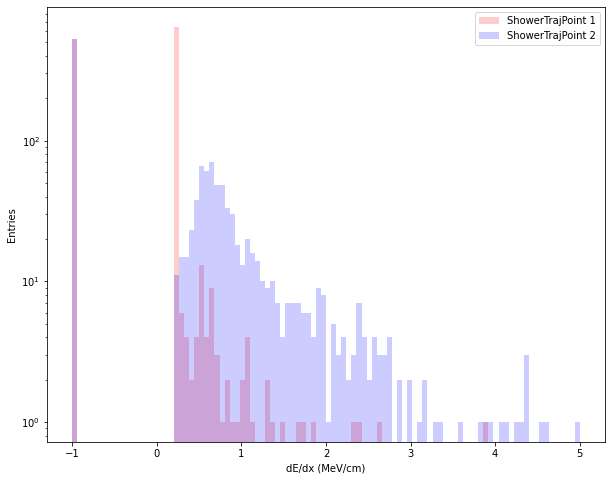

In [94]:
t_mod = uproot.open('../v09_72_00_03p01/srcs/icaruscode/fcl/caf/test.Unblind.DONOTLOOK.flat.caf.root:recTree')
#
t_mod2 = uproot.open('../v09_72_00_03p01/srcs/icaruscode/fcl/caf/test_noNorm.Unblind.DONOTLOOK.flat.caf.root:recTree')

plt.figure(figsize=(10,8))

bins = 100
range = (-1, 5)

data_mod = ak.to_numpy(ak.flatten(t_mod['rec.slc.reco.pfp.shw.bestplane_dEdx'].array()))
data_mod2 = ak.to_numpy(ak.flatten(t_mod2['rec.slc.reco.pfp.shw.bestplane_dEdx'].array()))
#data_mod[data_mod > range[1]] = range[1]  # Assign inf values to the last bin
#data_mod2[data_mod2 > range[1]] = range[1]  # Assign inf values to the last bin
data_mod[data_mod < 0] = range[0]  # Assign inf values to the last bin
data_mod2[data_mod2 < 0] = range[0]  # Assign inf values to the last bin

plt.hist(data_mod, bins=bins, range=range, histtype='stepfilled', label='ShowerTrajPoint 1', color='red', alpha=0.2)
plt.hist(data_mod2, bins=bins, range=range, histtype='stepfilled', label='ShowerTrajPoint 2', color='blue', alpha=0.2)

plt.ylabel("Entries")
plt.xlabel("dE/dx (MeV/cm)")
plt.legend()
plt.yscale('log')

In [54]:
class Variable:
    def __init__(self, name, bins, range, var=None):
        """
        Initialize a Variable object.

        Parameters:
        - name (str): Name of the variable.
        - bins (int): Number of bins for the histogram.
        - range (tuple): Range of the histogram as (min, max).
        """
        self.name = name
        self.bins = bins
        self.range = range
        if var is None:
            self.var = name
        else:
            self.var = var

    def __repr__(self):
        """
        Return a string representation of the Variable object.
        """
        return f"Variable(name='{self.name}', bins={self.bins}, range={self.range}, var='{self.var}')"


plotVars = [
    Variable(name='dEdx_plane_0', bins=65, range=(-2, 11), var='rec.slc.reco.pfp.shw.plane.0.dEdx'),
    Variable(name='dEdx_plane_1', bins=65, range=(-2, 11), var='rec.slc.reco.pfp.shw.plane.1.dEdx'),
    Variable(name='dEdx_plane_2', bins=65, range=(-2, 11), var='rec.slc.reco.pfp.shw.plane.2.dEdx'),
    Variable(name='dEdx_bestPlane', bins=65, range=(-2, 11), var='rec.slc.reco.pfp.shw.bestplane_dEdx'),
    Variable(name='energy_plane_0', bins=100, range=(0, 2), var='rec.slc.reco.pfp.shw.plane.0.energy'),
    Variable(name='energy_plane_1', bins=100, range=(0, 2), var='rec.slc.reco.pfp.shw.plane.1.energy'),
    Variable(name='energy_plane_2', bins=100, range=(0, 2), var='rec.slc.reco.pfp.shw.plane.2.energy'),
    Variable(name='energy_bestPlane', bins=100, range=(0, 2), var='rec.slc.reco.pfp.shw.bestplane_energy')
]

In [58]:

normFiles = []
rawFiles = []
with open('/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/mcFilesCAFNorm.list', 'r') as f:
    lines = f.readlines()
    normFiles = {f'{line.strip()}:recTree' for i, line in enumerate(lines)}

with open('/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/mcFilesCAF.list', 'r') as f:
    lines = f.readlines()
    rawFiles = {f'{line.strip()}:recTree' for i, line in enumerate(lines)}


print(normFiles)

# Extract file numbers from both sets
norm_numbers = set()
raw_numbers = set()

for file_path in normFiles:
    # Extract number from filename like "stage1_mc_20.flat.caf.root"
    filename = file_path.split('/')[-1]
    if 'stage1_mc_' in filename:
        number = filename.split('stage1_mc_')[1].split('.')[0]
        norm_numbers.add(number)

for file_path in rawFiles:
    filename = file_path.split('/')[-1]
    if 'stage1_mc_' in filename:
        number = filename.split('stage1_mc_')[1].split('.')[0]
        raw_numbers.add(number)

# Find common numbers
#common_numbers = norm_numbers.intersection(raw_numbers)

# Filter both sets to only include files with common numbers
#normFiles = {path for path in normFiles if any(f'stage1_mc_{num}.' in path for num in common_numbers)}
#rawFiles = {path for path in rawFiles if any(f'stage1_mc_{num}.' in path for num in common_numbers)}

#print(f"Filtered to {len(common_numbers)} common file numbers")
print(f"Norm files: {len(normFiles)}, Raw files: {len(rawFiles)}")

# Sort the file sets by the extracted numbers
def extract_number(file_path):
    filename = file_path.split('/')[-1]
    if 'stage1_mc_' in filename:
        return int(filename.split('stage1_mc_')[1].split('.')[0])
    return 0

normFiles = sorted(normFiles, key=extract_number)
rawFiles = sorted(rawFiles, key=extract_number)

normFiles = normFiles[:100]
rawFiles = rawFiles[:len(normFiles)]

print(f"First few norm files: {list(normFiles)[:3]}")
print(f"First few raw files: {list(rawFiles)[:3]}")

fout = r.TFile.Open("showerNormPlots.root", "RECREATE")

dirs = {"Norm": normFiles, "Raw": rawFiles}
# dirs = {
#     "Norm": "/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/testNorm20.flat.caf.root:recTree", 
#     # "Raw": "/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/testNoNorm.flat.caf.root:recTree", 
#     # "Uni": "/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/testUniNorm.flat.caf.root:recTree",
#     # "Traj": "/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/testTrajNorm.flat.caf.root:recTree",
#     #"Norm": "root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/showerDeDx_MC/norm2/caf/stage1_mc_20.flat.caf.root:recTree",
#     "Raw": "root://fndcadoor.fnal.gov:/icarus/scratch/users/micarrig/showerDeDx_MC/raw/caf/stage1_mc_20.flat.caf.root:recTree",
#     }

hists = {}
saveVars = {}

for key, path in dirs.items():

    hists[key] = [r.TH1F(f"h_{key}_{var.name}", f"{key} {var.name} distribution", var.bins, var.range[0], var.range[1]) for var in plotVars]
    saveVars[key] = [np.array([]) for var in plotVars]

    totalEvents = 0
    for bunch in uproot.iterate(path,
                                filter_name=["rec.slc.reco.pfp.shw.plane.0.dEdx",
                                            "rec.slc.reco.pfp.shw.plane.1.dEdx",
                                            "rec.slc.reco.pfp.shw.plane.2.dEdx",
                                            "rec.slc.reco.pfp.shw.bestplane_dEdx", 
                                            "rec.slc.reco.pfp.shw.plane.0.energy",
                                            "rec.slc.reco.pfp.shw.plane.1.energy",
                                            "rec.slc.reco.pfp.shw.plane.2.energy",
                                            "rec.slc.reco.pfp.shw.bestplane_energy",
                                            "rec.slc.reco.pfp.trk.truth.p.pdg"]):
        

        totalEvents += len(bunch['rec.slc.reco.pfp.shw.plane.0.dEdx'])
        print(f"Processing {key} with {totalEvents} events")
        for ivar, var_ in enumerate(plotVars):
            a = bunch[var_.var]
            #sel = (bunch['rec.slc.reco.pfp.shw.plane.2.energy'] > 0.00)
            sel = (np.abs(bunch['rec.slc.reco.pfp.trk.truth.p.pdg']) == 11)  # select electrons and positrons
            #sel = (t['rec.slc.reco.pfp.shw.plane.2.energy'].array() > 0.00)
            #sel = sel & (t['rec.slc.reco.pfp.trackScore'].array() > 0.5)
            a = a[sel] # cut on energy
            if len(saveVars[key]) == 0:
                print("appending")
                saveVars[key].append(ak.to_numpy(ak.flatten(a)))
            else:
                saveVars[key][ivar] = np.concatenate((saveVars[key][ivar], ak.to_numpy(ak.flatten(a))))
            a = ak.to_numpy(ak.flatten(a))
            a[a < 0] = -1 #var_.range[0]
            #a[a > var_.range[1]] = var_.range[1]-0.1
            a[a > 10] = 10
            a = arr.array('d', a)
            hists[key][ivar].FillN(len(a), a, np.ones(len(a)))

            

{'root://fndcadoor.fnal.gov://icarus/scratch/users/micarrig/showerEnergyCalCaf/outputs/06/output_610.flat.caf.root:recTree', 'root://fndcadoor.fnal.gov://icarus/scratch/users/micarrig/showerEnergyCalCaf/outputs/05/output_525.flat.caf.root:recTree', 'root://fndcadoor.fnal.gov://icarus/scratch/users/micarrig/showerEnergyCalCaf/outputs/09/output_928.flat.caf.root:recTree', 'root://fndcadoor.fnal.gov://icarus/scratch/users/micarrig/showerEnergyCalCaf/outputs/06/output_623.flat.caf.root:recTree', 'root://fndcadoor.fnal.gov://icarus/scratch/users/micarrig/showerEnergyCalCaf/outputs/07/output_725.flat.caf.root:recTree', 'root://fndcadoor.fnal.gov://icarus/scratch/users/micarrig/showerEnergyCalCaf/outputs/00/output_49.flat.caf.root:recTree', 'root://fndcadoor.fnal.gov://icarus/scratch/users/micarrig/showerEnergyCalCaf/outputs/08/output_807.flat.caf.root:recTree', 'root://fndcadoor.fnal.gov://icarus/scratch/users/micarrig/showerEnergyCalCaf/outputs/08/output_823.flat.caf.root:recTree', 'root://

In [60]:
fout = r.TFile.Open("energyNormalizationPlots.root", "RECREATE")

for key in hists.keys():
    fout.mkdir(key)

for k, v in hists.items():
    fout.cd(k)
    for hist in v:
        hist.Write()

fout.Close()

 FCN=20.9965 FROM MINOS     STATUS=SUCCESSFUL    320 CALLS        4185 TOTAL
                     EDM=1.08508e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.59235e+02   9.12902e+01   2.67397e+00  -2.80556e-05
   2  p1           1.90000e+00   1.15899e-01  -5.51936e-05** at limit **
   3  p2           2.78238e-01   2.16748e-02  -4.65176e-04   1.09617e-02
   4  p3           7.20051e+01   7.31651e+00  -6.83865e-02  -3.28388e-05
   5  p4           1.48686e+00   1.01244e-01  -3.61041e-03  -3.48538e-02
   6  p5           5.55978e-01   4.78514e-02   4.78514e-02  -1.80101e-03
                               ERR DEF= 0.5
 FCN=16.3826 FROM MINOS     STATUS=SUCCESSFUL    138 CALLS        1977 TOTAL
                     EDM=5.0836e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP       

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


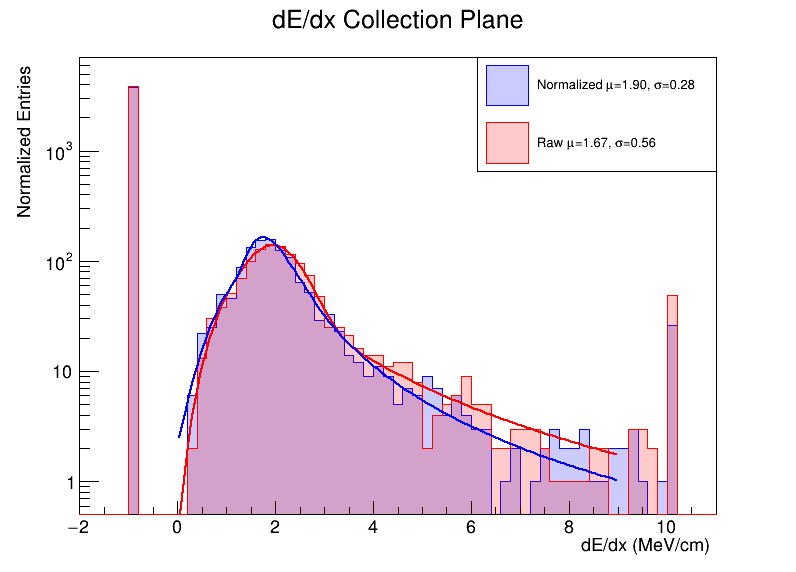

In [52]:
r.gStyle.SetOptStat(0)

plot = 2

c1 = r.TCanvas("c1", "c1", 800, 600)

fRaw = r.TF1("fRaw", "landau + [3]*exp(-0.5*((x-[4])/[5])^2)", 0, 9)
fNorm = r.TF1("fNorm", "landau + [3]*exp(-0.5*((x-[4])/[5])^2)", 0, 9)


# hists["Norm"][plot].Scale(1.0 / hists["Norm"][plot].Integral())
# hists['Raw'][plot].Scale(1.0 / hists['Raw'][plot].Integral())

hists["Norm"][plot].SetFillColorAlpha(r.kBlue, 0.2)
hists["Raw"][plot].SetFillColorAlpha(r.kRed, 0.2)
# hists["Uni"][plot].SetFillColorAlpha(r.kGreen, 0.2)
# hists["Traj"][plot].SetFillColorAlpha(r.kOrange, 0.2)

hists["Norm"][plot].SetTitle("dE/dx Collection Plane; dE/dx (MeV/cm); Normalized Entries")

fNorm.SetParLimits(1, 0, 1.9)
fNorm.SetParLimits(4, 0, 2)
fNorm.SetParLimits(5, 0, 1)
fNorm.SetParameters(100, 1, 2, 100, 1, 1)
hists["Norm"][plot].SetLineColor(r.kBlue)
hists["Norm"][plot].Draw("hist")
hists['Norm'][plot].Fit(fNorm, "lbemn", "", 0., 9)


fRaw.SetParLimits(1, 0, 1.9)
fRaw.SetParLimits(4, 0, 2)
fRaw.SetParLimits(5, 0, 1)
fRaw.SetParameters(100, 1.3, 1.5, 100, 1, 1)

hists['Raw'][plot].SetLineColor(r.kRed)
hists["Raw"][plot].Draw("same hist")
for _ in range(3):
    hists['Raw'][plot].Fit(fRaw, "lbemn", "", 0., 9)

fRaw.SetLineColor(r.kRed)
fNorm.SetLineColor(r.kBlue)

fRaw.Draw("same")
fNorm.Draw("same")

# hists['Uni'][plot].SetLineColor(r.kGreen)
# hists["Uni"][plot].Draw("same hist")
# hists['Traj'][plot].SetLineColor(r.kOrange)
# hists["Traj"][plot].Draw("same hist")

l1 = r.TLegend(0.6, 0.7, 0.9, 0.9)
l1.AddEntry(hists["Norm"][plot], f"Normalized #mu={fNorm.GetParameter(1):.2f}, #sigma={fNorm.GetParameter(2):.2f}", "f")
l1.AddEntry(hists["Raw"][plot], f"Raw #mu={fRaw.GetParameter(1):.2f}, #sigma={fRaw.GetParameter(2):.2f}", "f")
# l1.AddEntry(hists["Uni"][plot], "Unidirectional", "f")
# l1.AddEntry(hists["Traj"][plot], "Trajectory", "f")
l1.Draw()

c1.SetLogy(1)
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <Fit>: Abnormal termination of minimization.


 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FCN=57.2773 FROM MINOS     STATUS=SUCCESSFUL    711 CALLS        7075 TOTAL
                     EDM=4.17406e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   4.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.03774e+04   2.60645e+03  -3.10366e+00  -9.30621e-08
   2  p1           4.68981e-10   2.61106e-03  -6.97882e-05** at limit **
   3  p2           3.40032e-03   5.41431e-04   4.34299e-07  -7.60013e-01
   4  p3           1.81042e+03   8.23399e+01 

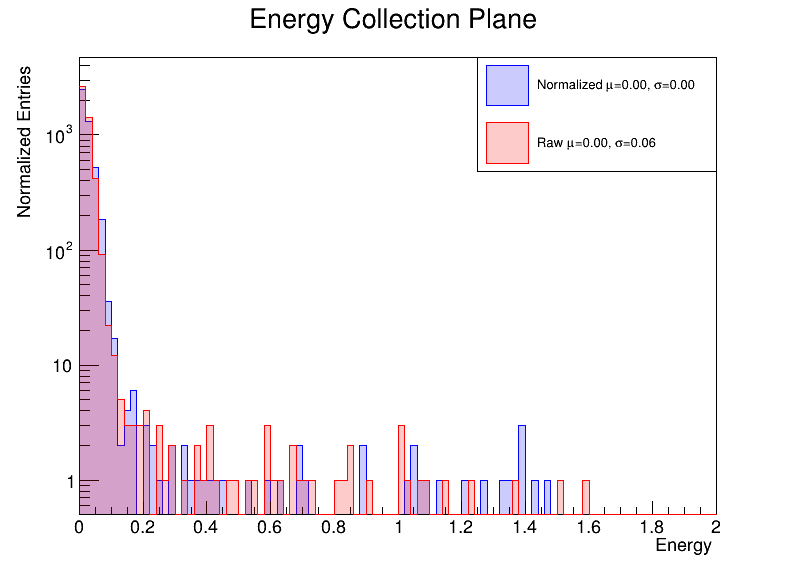

In [61]:
r.gStyle.SetOptStat(0)

plot = 7

c1 = r.TCanvas("c1", "c1", 800, 600)

fRaw = r.TF1("fRaw", "landau + [3]*exp(-0.5*((x-[4])/[5])^2)", 0, 9)
fNorm = r.TF1("fNorm", "landau + [3]*exp(-0.5*((x-[4])/[5])^2)", 0, 9)


# hists["Norm"][plot].Scale(1.0 / hists["Norm"][plot].Integral())
# hists['Raw'][plot].Scale(1.0 / hists['Raw'][plot].Integral())

hists["Norm"][plot].SetFillColorAlpha(r.kBlue, 0.2)
hists["Raw"][plot].SetFillColorAlpha(r.kRed, 0.2)
# hists["Uni"][plot].SetFillColorAlpha(r.kGreen, 0.2)
# hists["Traj"][plot].SetFillColorAlpha(r.kOrange, 0.2)

hists["Norm"][plot].SetTitle("Energy Collection Plane; Energy; Normalized Entries")

fNorm.SetParLimits(1, 0, 1.9)
fNorm.SetParLimits(4, 0, 2)
fNorm.SetParLimits(5, 0, 1)
fNorm.SetParameters(100, 1, 2, 100, 1, 1)
hists["Norm"][plot].SetLineColor(r.kBlue)
hists["Norm"][plot].Draw("hist")
hists['Norm'][plot].Fit(fNorm, "lbemn", "", 0., 9)


fRaw.SetParLimits(1, 0, 1.9)
fRaw.SetParLimits(4, 0, 2)
fRaw.SetParLimits(5, 0, 1)
fRaw.SetParameters(100, 1.3, 1.5, 100, 1, 1)

hists['Raw'][plot].SetLineColor(r.kRed)
hists["Raw"][plot].Draw("same hist")
for _ in range(3):
    hists['Raw'][plot].Fit(fRaw, "lbemn", "", 0., 9)

fRaw.SetLineColor(r.kRed)
fNorm.SetLineColor(r.kBlue)

# fRaw.Draw("same")
# fNorm.Draw("same")

# hists['Uni'][plot].SetLineColor(r.kGreen)
# hists["Uni"][plot].Draw("same hist")
# hists['Traj'][plot].SetLineColor(r.kOrange)
# hists["Traj"][plot].Draw("same hist")

l1 = r.TLegend(0.6, 0.7, 0.9, 0.9)
l1.AddEntry(hists["Norm"][plot], f"Normalized #mu={fNorm.GetParameter(1):.2f}, #sigma={fNorm.GetParameter(2):.2f}", "f")
l1.AddEntry(hists["Raw"][plot], f"Raw #mu={fRaw.GetParameter(1):.2f}, #sigma={fRaw.GetParameter(2):.2f}", "f")
# l1.AddEntry(hists["Uni"][plot], "Unidirectional", "f")
# l1.AddEntry(hists["Traj"][plot], "Trajectory", "f")
l1.Draw()

c1.SetLogy(1)
c1.Draw()

Normalized data size: 53666
Raw data size: 53666


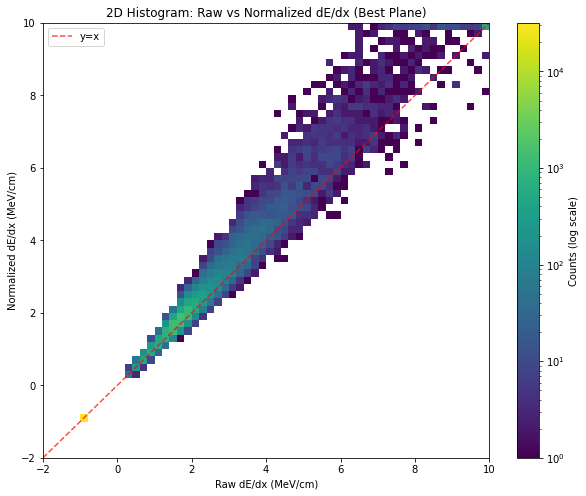

In [200]:
plt.figure(figsize=(10, 8))

# Use the saved arrays from the previous processing
norm_data = saveVars['Norm'][2]
raw_data = saveVars['Raw'][2]

print("Normalized data size:", len(norm_data))
print("Raw data size:", len(raw_data))

# Filter out invalid values (like -999)
#valid_mask = (norm_data > -900) & (raw_data > -900)
norm_data[norm_data < 0] = -1
raw_data[raw_data < 0] = -1 
norm_data[norm_data > 10] = 10
raw_data[raw_data > 10] = 10
norm_filtered = norm_data
raw_filtered = raw_data

# Create 2D histogram
plt.hist2d(raw_filtered, norm_filtered, bins=60, range=[[-2, 10], [-2, 10]], 
           cmap='viridis', norm=colors.LogNorm())
plt.colorbar(label='Counts (log scale)')

plt.xlabel('Raw dE/dx (MeV/cm)')
plt.ylabel('Normalized dE/dx (MeV/cm)')
plt.title('2D Histogram: Raw vs Normalized dE/dx (Best Plane)')

# Add diagonal line for reference
plt.plot([-2, 10], [-2, 10], 'r--', alpha=0.7, label='y=x')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Normalized data size: 53666
Raw data size: 53666


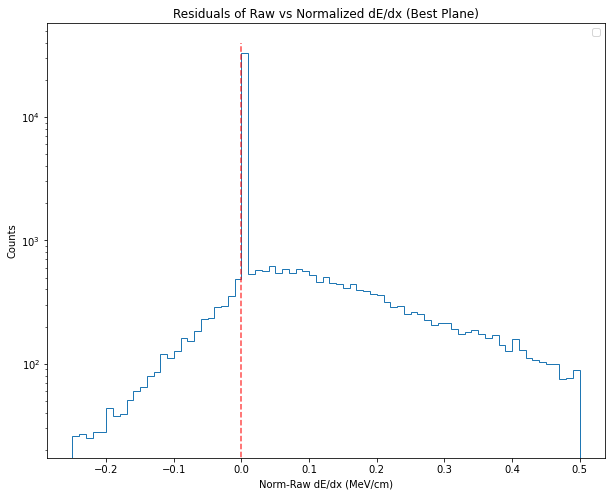

In [203]:
plt.figure(figsize=(10, 8))

# Use the saved arrays from the previous processing
norm_data = saveVars['Norm'][2]
raw_data = saveVars['Raw'][2]

print("Normalized data size:", len(norm_data))
print("Raw data size:", len(raw_data))

# Filter out invalid values (like -999)
#valid_mask = (norm_data > -900) & (raw_data > -900)
norm_data[norm_data < 0] = -1
raw_data[raw_data < 0] = -1 
norm_data[norm_data > 10] = 10
raw_data[raw_data > 10] = 10
norm_filtered = norm_data
raw_filtered = raw_data

residual = (norm_filtered - raw_filtered)

plt.hist(residual, bins=75, range=[-0.25, 0.5], histtype='step')

plt.xlabel('Norm-Raw dE/dx (MeV/cm)')
plt.ylabel('Counts')
plt.title('Residuals of Raw vs Normalized dE/dx (Best Plane)')

plt.plot([0, 0], [0, 40000], 'r--', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.show()

In [167]:
cutoff = 1
df_compare[(df_compare['Norm'] < cutoff) & (df_compare['Raw'] > cutoff)]

,Norm,Raw,Difference
6,-1.000000,1.278983,-2.278983
36,0.322974,1.947800,-1.624825
98,0.322974,1.335284,-1.012310
201,-1.000000,2.778568,-3.778568
294,-1.000000,3.249832,-4.249832
309,-1.000000,6.457050,-7.457050
338,0.322974,2.718626,-2.395652
369,-1.000000,2.002209,-3.002209
384,-1.000000,3.736490,-4.736490
405,0.322974,1.201111,-0.878137


### Use energy normalization plots (larger scale data)

Warning the raw/norm histograms are switched due to bug in makeEnergyNormPlots, do you still want this?!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Warning the raw/norm histograms are switched due to bug in makeEnergyNormPlots, do you still want this?!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Warning the raw/norm histograms are switched due to bug in makeEnergyNormPlots, do you still want this?!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


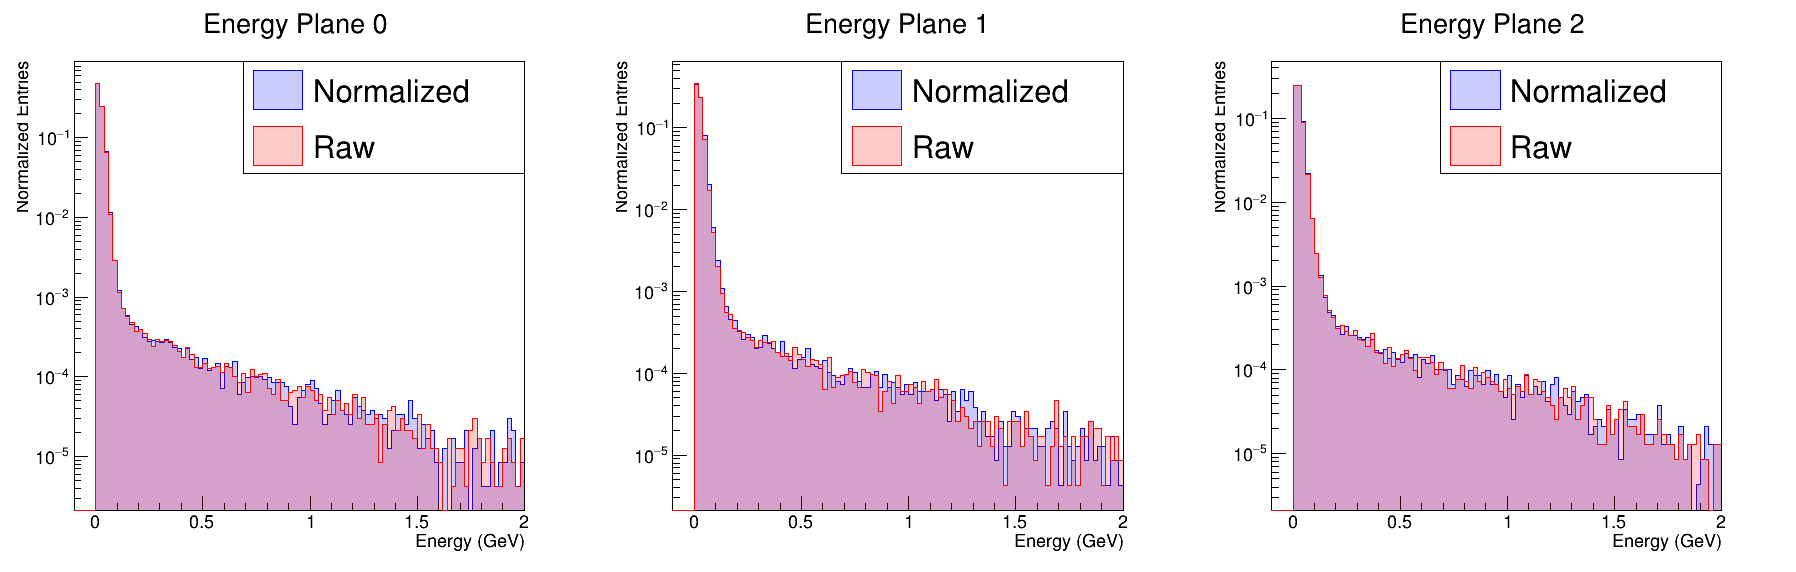

In [2]:
r.gStyle.SetOptStat(0)

c1 = r.TCanvas("c1", "c1", 1800, 600)

c1.Divide(3, 1)

fin = r.TFile.Open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/energyNormalizationPlots_v4.root", "READ")

fit = False

# fRaw = r.TF1("fRaw", "landau + [3]*TMath::Power(([4]/[5]),(x/[5]))*(TMath::Exp(-([1]/[2])))/TMath::Gamma((x/[2])+1.)", 0, 2)
# fNorm = r.TF1("fNorm", "landau + [3]*TMath::Power(([4]/[5]),(x/[5]))*(TMath::Exp(-([1]/[2])))/TMath::Gamma((x/[2])+1.)", 0, 2)
# fRaw = r.TF1("fRaw", "landau + [3]*exp(-0.5*((x-[4])/[5])^2)", 0, 2)
# fNorm = r.TF1("fNorm", "landau + [3]*exp(-0.5*((x-[4])/[5])^2)", 0, 2)

# Store legends to prevent garbage collection
legends = []

for i in range(3):
    c1.cd(i+1)
    
    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.4, 0.7, 0.9, 0.9)
    fRaw = r.TF1("fRaw", "landau", 0, 2)
    fNorm = r.TF1("fNorm", "landau", 0, 2)

    print("Warning the raw/norm histograms are switched due to bug in makeEnergyNormPlots, do you still want this?!!!!!!!!!!!!!!!!!!!!!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    h_norm_energy = fin.Get(f"Norm/h_energy_plane{i}_norm")
    h_raw_energy = fin.Get(f"Raw/h_energy_plane{i}")

    h_norm_energy.Scale(1.0 / h_norm_energy.Integral(1, h_norm_energy.GetNbinsX()+1))
    h_raw_energy.Scale(1.0 / h_raw_energy.Integral(1, h_raw_energy.GetNbinsX()+1))

    h_norm_energy.SetFillColorAlpha(r.kBlue, 0.2)
    h_raw_energy.SetFillColorAlpha(r.kRed, 0.2)

    h_norm_energy.SetTitle(f"Energy Plane {i}; Energy (GeV); Normalized Entries")

    h_norm_energy.SetLineColor(r.kBlue)
    h_norm_energy.GetXaxis().SetRangeUser(-0.1, 2)
    h_norm_energy.Draw("hist")
    h_raw_energy.SetLineColor(r.kRed)
    h_raw_energy.Draw("same hist")
    
    if fit:

        fRaw = r.TF1("fRaw", "landau", 0, 2)
        fNorm = r.TF1("fNorm", "landau", 0, 2)
        

        fNorm.SetParLimits(1, 0, 1.9)
        fNorm.SetParLimits(2, 0, 2)    
        fNorm.SetParameters(1, 20, 0.2)
        fRaw.SetParLimits(1, 0, 1.9)
        fRaw.SetParLimits(2, 0, 2)
        # fRaw.SetParLimits(5, 0, 1)
        fRaw.SetParameters(1, 20, 0.2)

        h_norm_energy.Fit(fNorm, "bmllne", "", 0., 0.5)

        #for _ in range(3):
        h_raw_energy.Fit(fRaw, "bmllne", "", 0., 0.5)

        fRaw.SetLineColor(r.kRed)
        fNorm.SetLineColor(r.kBlue)

        fRaw.Draw("same")
        fNorm.Draw("same")


        legend.AddEntry(h_norm_energy, f"Normalized #mu={fNorm.GetParameter(1):.4e}, #sigma={fNorm.GetParameter(2):.4e}", "f")
        legend.AddEntry(h_raw_energy, f"Raw #mu={fRaw.GetParameter(1):.4e}, #sigma={fRaw.GetParameter(2):.4e}", "f")
    else:
        legend.AddEntry(h_norm_energy, f"Normalized", "f")
        legend.AddEntry(h_raw_energy, f"Raw", "f")
    legend.Draw("same")
    legends.append(legend)  # Prevent garbage collection

    r.gPad.SetLogy()

c1.SetLogy(1)
c1.Draw()

****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      9006.72
NDf                       =          435
Edm                       =  4.81455e-19
NCalls                    =           97
p0                        =     0.985885   +/-   0.00274036    -0.00060224  +0.00060224   (Minos) 
****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      20877.8
NDf                       =          574
Edm                       =  1.86942e-18
NCalls                    =          103
p0                        =     0.957242   +/-   0.00351205    -0.000582336 +0.000582336  (Minos) 
****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      12761.5
NDf                       =          500
Edm                       =   3.3981e-19
NCalls                    =           43
p0                        =     0.989898   +/-   0.00285487    -0.000565095 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


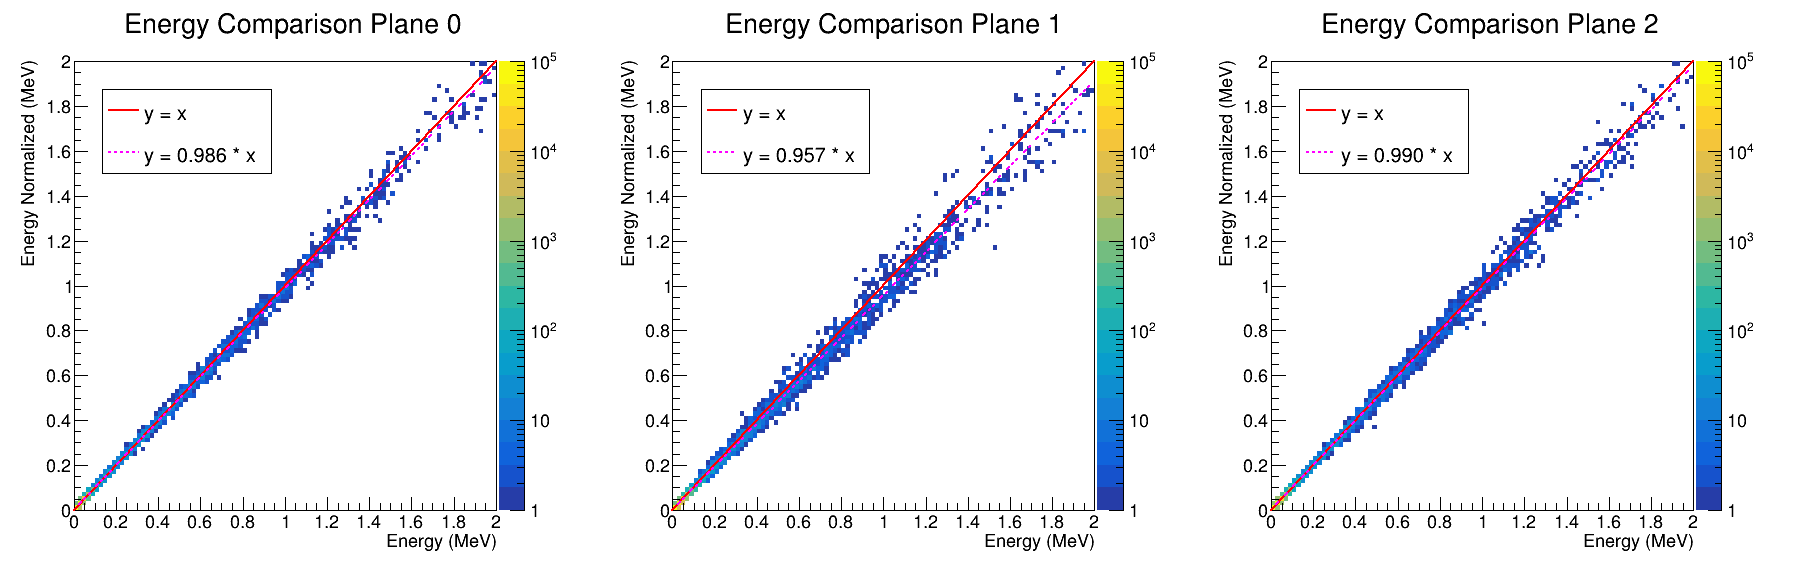

In [30]:
r.gStyle.SetOptStat(0)

c1 = r.TCanvas("c1", "c1", 1800, 600)

c1.Divide(3, 1)

fin = r.TFile.Open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/energyNormalizationPlots_v3.root", "READ")

fit = True

# Store legends to prevent garbage collection
legends = []

l = r.TLine(0, 0, 2, 2)
l.SetLineColor(r.kRed)
l.SetLineWidth(2)


for i in range(3):
    c1.cd(i+1)

    h = fin.Get(f"Comparison/h_energy2d_plane{i}")

    h.SetTitle(f"Energy Comparison Plane {i}; Energy (MeV); Energy Normalized (MeV)")

    h.SetLineColor(r.kBlue)
    h.GetXaxis().SetRangeUser(0, 2)
    h.GetYaxis().SetRangeUser(0, 2)
    h.GetZaxis().SetRangeUser(1, 1e5)

    h.SetLineColor(r.kRed)
    
    h.Draw("colz")
    l.Draw("same")

    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.6, 0.7, 0.9, 0.9)
    
    #h.GetYaxis().SetRangeUser(1e-6, 3e-1)

    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.15, 0.7, 0.45, 0.85)

    if fit:
        f = r.TF1(f"f{i}", "x*[0]", 0, 2)
        f.SetParameters(1)
        f.SetLineColor(r.kMagenta)
        f.SetLineStyle(2)
        f.Draw("same")
        h.Fit(f, "mne", "", 0, 2)
        legend.AddEntry(l, f"y = x", "l")
        legend.AddEntry(f, f"y = {f.GetParameter(0):.3f} * x", "l")


    legend.Draw("same")
    legends.append(legend)  # Prevent garbage collection

    r.gPad.SetLogz(1)
    r.gPad.SetRightMargin(0.15)

c1.SetLogy(0)
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


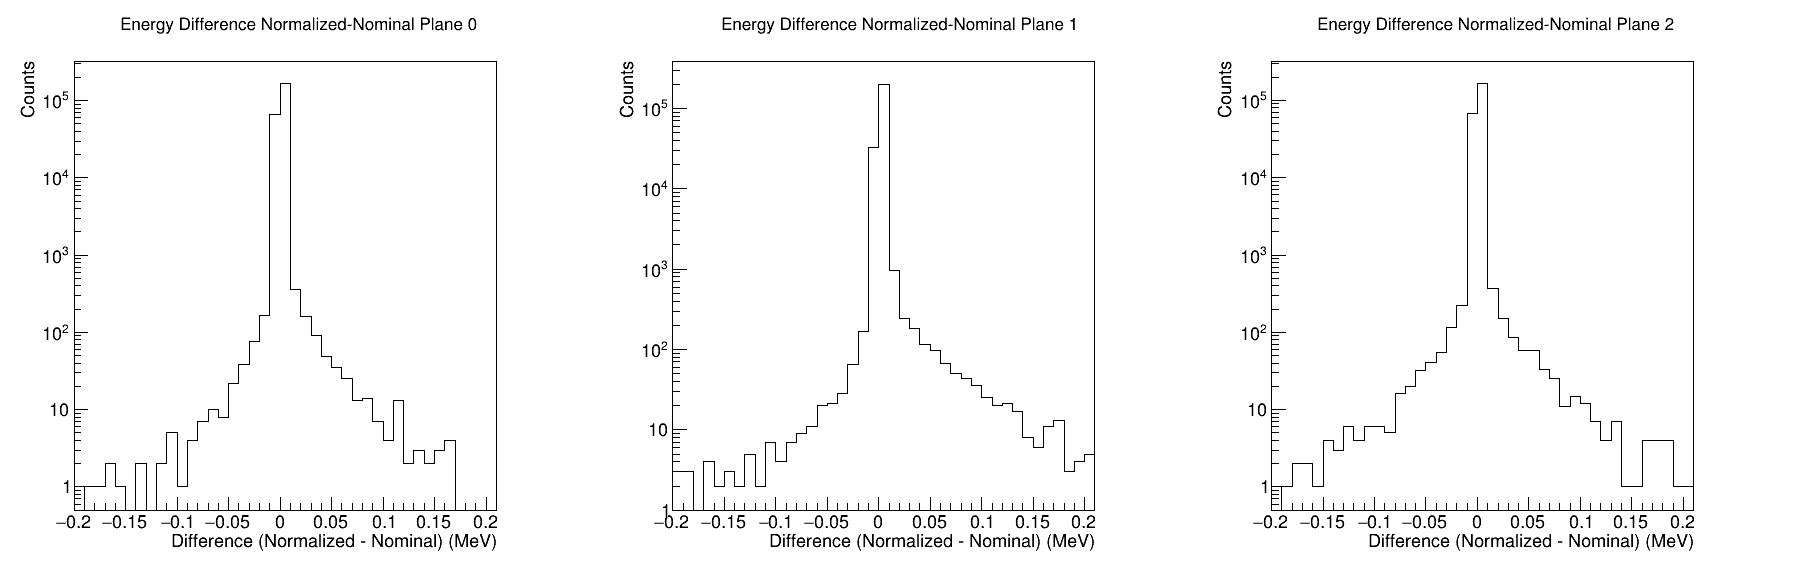

In [ ]:
r.gStyle.SetOptStat(0)

c1 = r.TCanvas("c1", "c1", 1800, 600)

c1.Divide(3, 1)

fin = r.TFile.Open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/energyNormalizationPlots_v3.root", "READ")

fit = False

# Store legends to prevent garbage collection
legends = []

for i in range(3):
    c1.cd(i+1)

    h = fin.Get(f"Difference/h_energyDiff_plane{i}")

    h.SetTitle(f"Energy Difference Normalized-Nominal Plane {i}; #DeltaEnergy (Normalized - Nominal) (MeV); Counts")

    h.SetLineColor(r.kBlue)
    h.GetXaxis().SetRangeUser(-0.2, 0.2)
    #h.GetYaxis().SetRangeUser(0, 2)
    #h.GetZaxis().SetRangeUser(1, 1e5)

    h.SetLineColor(r.kBlack)
    
    h.Draw("colz")

    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.6, 0.7, 0.9, 0.9)
    
    #h.GetYaxis().SetRangeUser(1e-6, 3e-1)

    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.15, 0.7, 0.45, 0.85)

    if fit:
        f = r.TF1(f"f{i}", "x*[0]", 0, 2)
        f.SetParameters(1)
        f.SetLineColor(r.kMagenta)
        f.SetLineStyle(2)
        f.Draw("same")
        h.Fit(f, "mne", "", 0, 2)
        legend.AddEntry(l, f"y = x", "l")
        legend.AddEntry(f, f"y = {f.GetParameter(0):.3f} * x", "l")


    #legend.Draw("same")
    #legends.append(legend)  # Prevent garbage collection

    r.gPad.SetLogy(1)
    r.gPad.SetRightMargin(0.15)

c1.SetLogy(0)
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


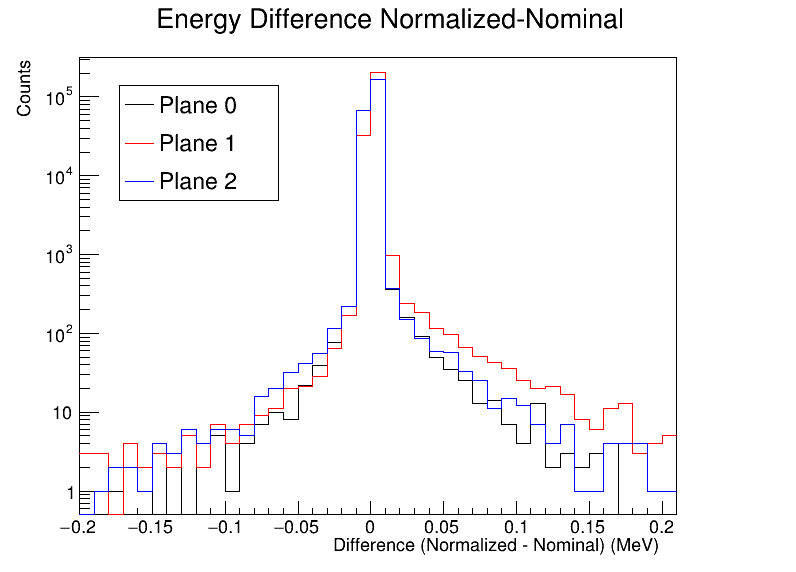

In [ ]:
r.gStyle.SetOptStat(0)

c1 = r.TCanvas("c1", "c1", 800, 600)

colors = [r.kBlack, r.kRed, r.kBlue, r.kGreen+2]

fin = r.TFile.Open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/energyNormalizationPlots_v3.root", "READ")

legend = r.TLegend(0.15, 0.65, 0.35, 0.85)

for i in range(3):

    h = fin.Get(f"Difference/h_energyDiff_plane{i}")

    h.SetLineColor(r.kBlue)
    h.GetXaxis().SetRangeUser(-0.2, 0.2)

    h.SetLineColor(colors[i])

    
    if i == 0:
        h.SetTitle(f"Energy Difference Normalized-Nominal; #DeltaEnergy (Normalized - Nominal) (MeV); Counts")        
        h.Draw("colz")
    else:
        h.Draw("same colz")

    r.gPad.SetLogy(1)
    r.gPad.SetRightMargin(0.15)

    legend.AddEntry(h, f"Plane {i}", "l")

legend.Draw()
#c1.SetLogy(0)
c1.Draw()

 FCN=679.615 FROM MINOS     STATUS=SUCCESSFUL     66 CALLS        1529 TOTAL
                     EDM=1.74562e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.72924e+04   3.20051e+02  -2.36460e+01   4.81957e-07
   2  p1           1.10556e+00   4.12726e-03   1.63960e-04  -2.11217e-01
   3  p2           3.55939e-01   2.05451e-03  -1.25421e-05   1.72258e-01
   4  p3           2.87092e+03   4.74009e+01   5.52590e+00  -1.50690e-05
   5  p4           2.16642e+00   9.15583e-03  -3.79235e-04  -1.16460e-01
   6  p5           5.54619e-01   1.06782e-02   1.06782e-02   4.03552e-02
                               ERR DEF= 0.5
 FCN=671.407 FROM MINOS     STATUS=SUCCESSFUL     66 CALLS        1487 TOTAL
                     EDM=3.10306e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP      

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


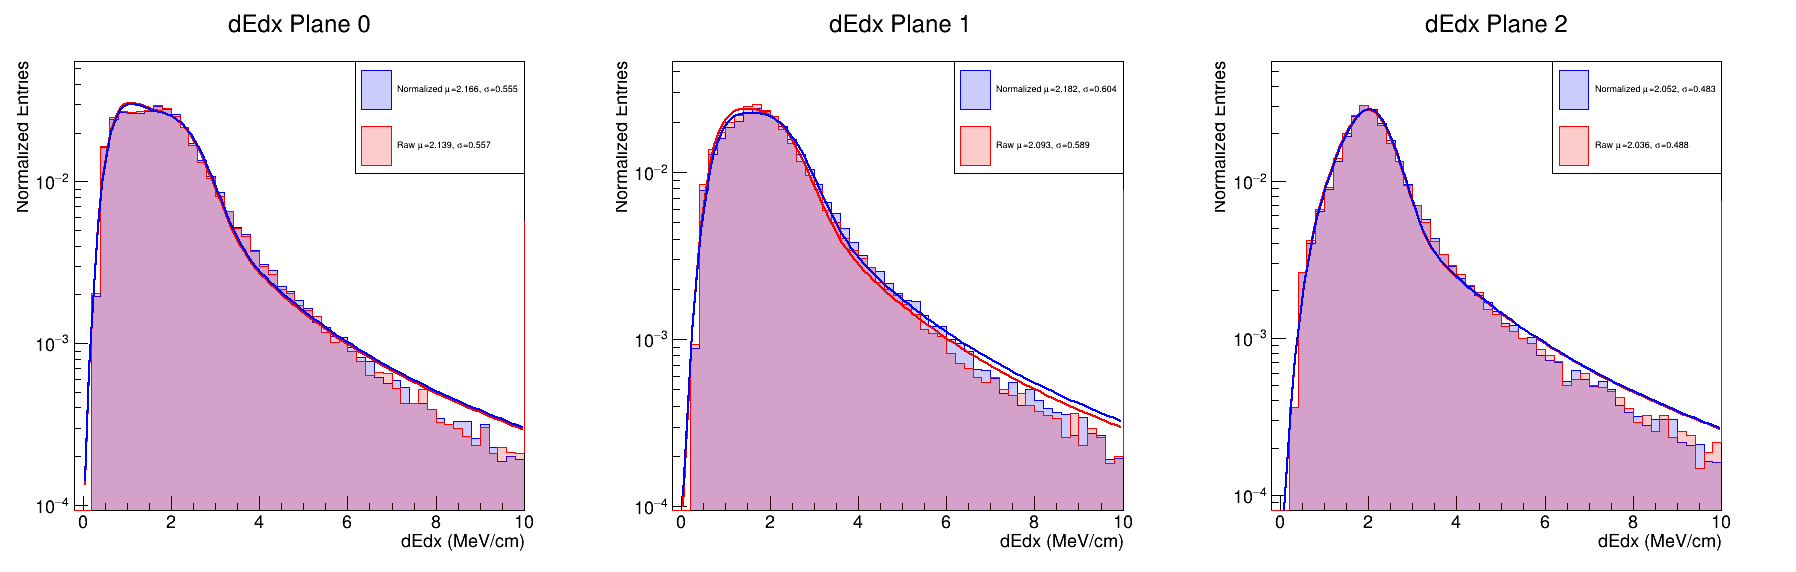

In [23]:
r.gStyle.SetOptStat(0)

c1 = r.TCanvas("c1", "c1", 1800, 600)

c1.Divide(3, 1)

fin = r.TFile.Open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/energyNormalizationPlots_v4.root", "READ")

fit = True

# Store legends to prevent garbage collection
legends = []

for i in range(3):
    c1.cd(i+1)

    h_norm_energy = fin.Get(f"Norm/h_dedx_plane{i}_norm")
    h_raw_energy = fin.Get(f"Raw/h_dedx_plane{i}")

    normScale =  h_norm_energy.Integral(1, h_norm_energy.GetNbinsX()+1)
    rawScale =  h_raw_energy.Integral(1, h_raw_energy.GetNbinsX()+1)

    h_norm_energy.SetFillColorAlpha(r.kBlue, 0.2)
    h_raw_energy.SetFillColorAlpha(r.kRed, 0.2)

    h_norm_energy.SetTitle(f"dEdx Plane {i}; dEdx (MeV/cm); Normalized Entries")

    h_norm_energy.SetLineColor(r.kBlue)
    h_norm_energy.GetXaxis().SetRangeUser(-0.1, 10)
    h_norm_energy.GetYaxis().SetRangeUser(1e-4, 3e-1)

    h_raw_energy.SetLineColor(r.kRed)
    
    h_norm_energy.Draw("hist")
    h_raw_energy.Draw("same hist")

    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.6, 0.7, 0.9, 0.9)
    
    h_norm_energy.GetYaxis().SetRangeUser(1e-4, 4e-2)

    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.6, 0.7, 0.9, 0.9)

    if fit:
        fRaw = r.TF1("fRaw", "landau + [3]*exp(-0.5*((x-[4])/[5])^2)", 0, 10)
        fNorm = r.TF1("fNorm", "landau + [3]*exp(-0.5*((x-[4])/[5])^2)", 0, 10)
        fNorm.SetParLimits(1, 0, 1.9)
        fNorm.SetParLimits(4, 0, 3)
        fNorm.SetParLimits(5, 0, 1)
        fNorm.SetParameters(100, 1.3, 1.5, 100, 1, 1)
        h_norm_energy.Fit(fNorm, "lbemn", "", 0., 9)
        fRaw.SetParLimits(1, 0, 1.9)
        fRaw.SetParLimits(4, 0, 3)
        fRaw.SetParLimits(5, 0, 1)
        fRaw.SetParameters(100, 1.3, 1.5, 100, 1, 1)

        h_raw_energy.Fit(fRaw, "bmllne", "", 0., 9)

        fRaw.SetLineColor(r.kRed)
        fNorm.SetLineColor(r.kBlue)

        fRaw.SetParameter(0, fRaw.GetParameter(0) * (1 / rawScale))
        fNorm.SetParameter(0, fNorm.GetParameter(0) * (1 / normScale))
        fRaw.SetParameter(3, fRaw.GetParameter(3) * (1 / rawScale))
        fNorm.SetParameter(3, fNorm.GetParameter(3) * (1 / normScale))
        fRaw.Draw("same")
        fNorm.Draw("same")


        legend.AddEntry(h_norm_energy, f"Normalized #mu={fNorm.GetParameter(4):.3f}, #sigma={fNorm.GetParameter(5):.3f}", "f")
        legend.AddEntry(h_raw_energy, f"Raw #mu={fRaw.GetParameter(4):.3f}, #sigma={fRaw.GetParameter(5):.3f}", "f")
        
    else:
        legend.AddEntry(h_norm_energy, f"Normalized", "f")
        legend.AddEntry(h_raw_energy, f"Raw", "f")

    legend.Draw("same")
    legends.append(legend)  # Prevent garbage collection
    h_raw_energy.Scale(1.0 / rawScale)
    h_norm_energy.Scale(1.0 / normScale)
    r.gPad.SetLogy()

c1.SetLogy(1)
c1.Draw()

****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      39583.1
NDf                       =          416
Edm                       =    5.558e-18
NCalls                    =           29
p0                        =     0.981991   +/-   0.00273756    -0.000280644 +0.000280644  (Minos) 
****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      91371.7
NDf                       =          620
Edm                       =  7.73493e-18
NCalls                    =           43
p0                        =     0.945226   +/-   0.00344705    -0.000283947 +0.000283947  (Minos) 
****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      47208.8
NDf                       =          454
Edm                       =  9.18624e-18
NCalls                    =           29
p0                        =     0.992248   +/-   0.00308587    -0.000302618 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


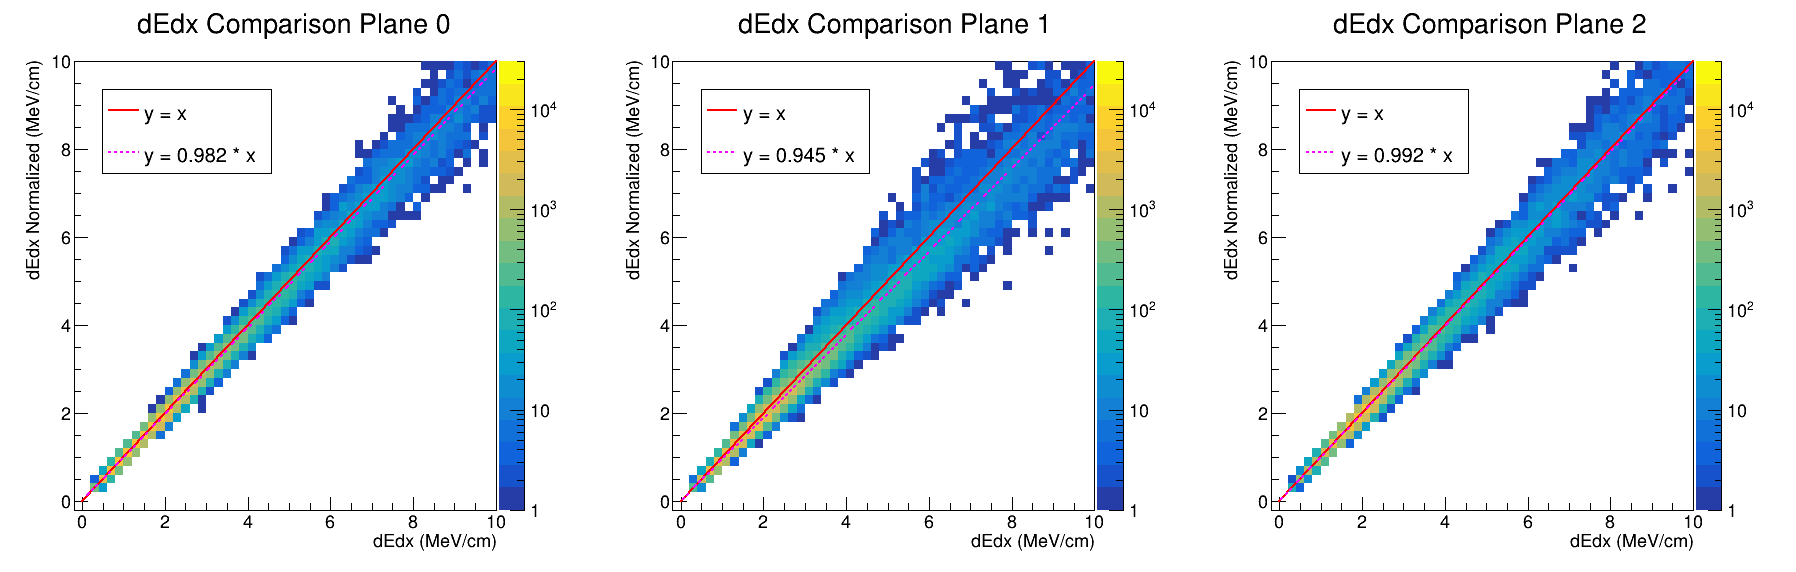

In [24]:
r.gStyle.SetOptStat(0)

c1 = r.TCanvas("c1", "c1", 1800, 600)

c1.Divide(3, 1)

fin = r.TFile.Open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/energyNormalizationPlots_v4.root", "READ")

fit = True

# Store legends to prevent garbage collection
legends = []

l = r.TLine(0, 0, 10, 10)
l.SetLineColor(r.kRed)
l.SetLineWidth(2)


for i in range(3):
    c1.cd(i+1)

    h = fin.Get(f"Comparison/h_dedx2d_plane{i}")

    h.SetTitle(f"dEdx Comparison Plane {i}; dEdx (MeV/cm); dEdx Normalized (MeV/cm)")

    h.SetLineColor(r.kBlue)
    h.GetXaxis().SetRangeUser(-0.1, 10)
    h.GetYaxis().SetRangeUser(-0.1, 10)
    h.GetZaxis().SetRangeUser(1, 3e4)

    h.SetLineColor(r.kRed)
    
    h.Draw("colz")
    l.Draw("same")

    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.6, 0.7, 0.9, 0.9)
    
    #h.GetYaxis().SetRangeUser(1e-6, 3e-1)

    # Create a unique legend for each pad and store it
    legend = r.TLegend(0.15, 0.7, 0.45, 0.85)

    if fit:
        f = r.TF1(f"f{i}", "x*[0]", 0, 10)
        f.SetParameters(1)
        f.SetLineColor(r.kMagenta)
        f.SetLineStyle(2)
        f.Draw("same")
        h.Fit(f, "mne", "", 0, 10)
        legend.AddEntry(l, f"y = x", "l")
        legend.AddEntry(f, f"y = {f.GetParameter(0):.3f} * x", "l")


    legend.Draw("same")
    legends.append(legend)  # Prevent garbage collection

    r.gPad.SetLogz(1)
    r.gPad.SetRightMargin(0.15)

c1.SetLogy(0)
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


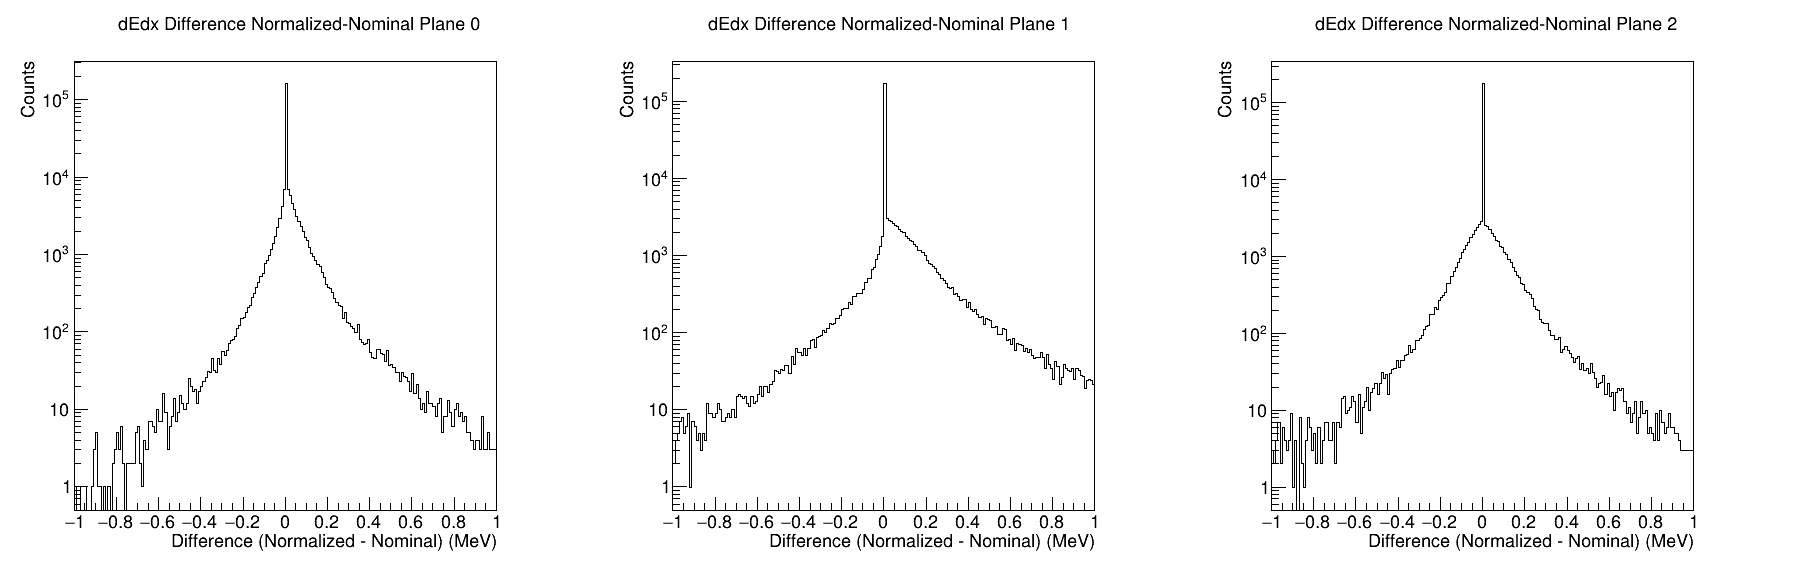

In [ ]:
r.gStyle.SetOptStat(0)

c1 = r.TCanvas("c1", "c1", 1800, 600)

c1.Divide(3, 1)

fin = r.TFile.Open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/energyNormalizationPlots_v3.root", "READ")


for i in range(3):
    c1.cd(i+1)

    h = fin.Get(f"Difference/h_dedxDiff_plane{i}")

    h.SetTitle(f"dEdx Difference Normalized-Nominal Plane {i}; #DeltadEdx (Normalized - Nominal) (MeV); Counts")

    h.SetLineColor(r.kBlue)

    h.SetLineColor(r.kBlack)
    
    h.Draw("colz")

    r.gPad.SetLogy(1)
    r.gPad.SetRightMargin(0.15)

c1.SetLogy(0)
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


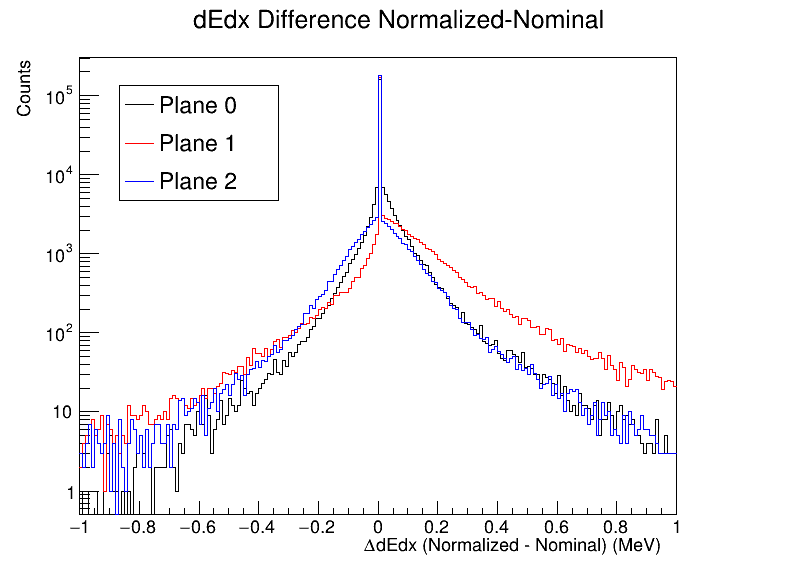

In [50]:
r.gStyle.SetOptStat(0)

c1 = r.TCanvas("c1", "c1", 800, 600)

colors = [r.kBlack, r.kRed, r.kBlue, r.kGreen+2]

fin = r.TFile.Open("/exp/icarus/app/users/micarrig/showerCal/v10_06_00_04p02/energyNormalizationPlots_v3.root", "READ")

legend = r.TLegend(0.15, 0.65, 0.35, 0.85)

for i in range(3):

    h = fin.Get(f"Difference/h_dedxDiff_plane{i}")

    h.SetLineColor(r.kBlue)
    #h.GetXaxis().SetRangeUser(-0.2, 0.2)

    h.SetLineColor(colors[i])

    
    if i == 0:
        h.SetTitle(f"dEdx Difference Normalized-Nominal; #DeltadEdx (Normalized - Nominal) (MeV); Counts")        
        h.Draw("colz")
    else:
        h.Draw("same colz")

    r.gPad.SetLogy(1)
    r.gPad.SetRightMargin(0.15)

    legend.AddEntry(h, f"Plane {i}", "l")

legend.Draw()
#c1.SetLogy(0)
c1.Draw()

### Show YZ Maps from cvmfs

dict_keys(['AnodePlane:anode110', 'AnodePlane:anode120', 'AnodePlane:anode111', 'AnodePlane:anode121', 'AnodePlane:anode112', 'AnodePlane:anode122', 'AnodePlane:anode113', 'AnodePlane:anode123'])


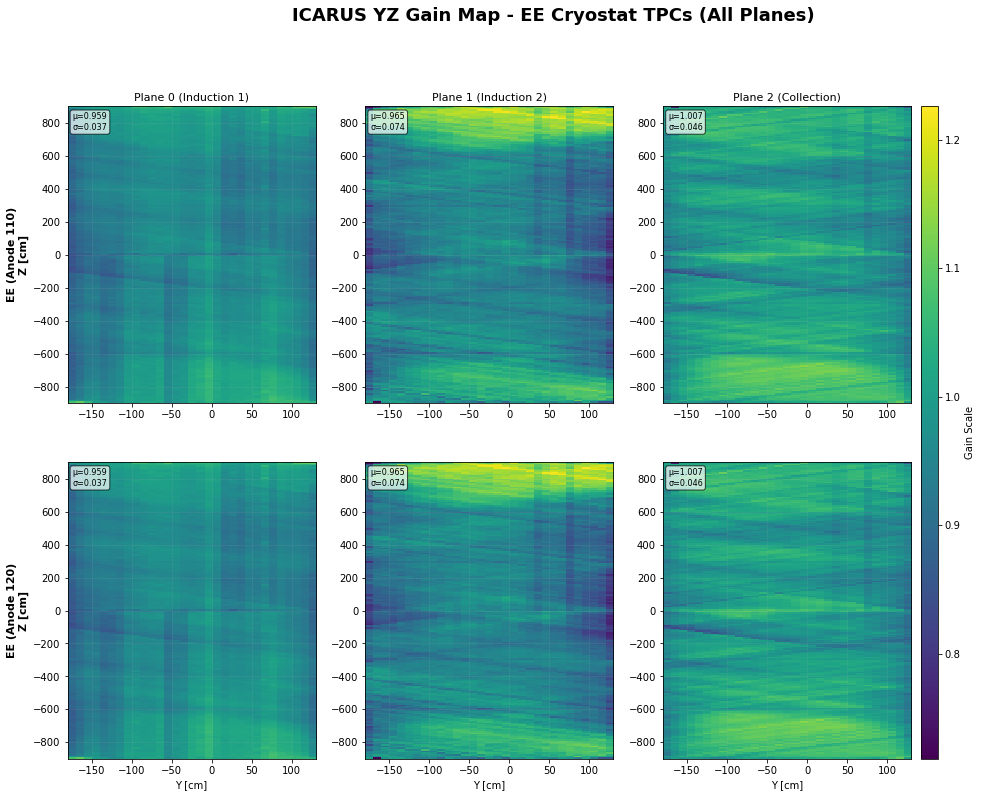

In [96]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Read the JSON file
with open('/cvmfs/icarus.opensciencegrid.org/products/icarus/icarus_data/v10_06_02/icarus_data/WirecellData/yzmap_gain_icarus_v4_run2.json', 'r') as f:
    data = json.load(f)

# Configuration
bin_width = 10.0   # cm
bin_height = 10.0  # cm
y_offset = 180.0   # cm
z_offset = 900.0   # cm

# EE TPC modules
anodes_ee = ['AnodePlane:anode110', 'AnodePlane:anode120']
tpc_names = ['EE (Anode 110)', 'EE (Anode 120)']
plane_names = ['0 (Induction 1)', '1 (Induction 2)', '2 (Collection)']

# Create 2x3 subplot grid (2 TPCs × 3 planes)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Find common color scale
all_gains = []
for anode_name in anodes_ee:
    if anode_name in data: 
        for plane in ['0', '1', '2']: 
            if plane in data[anode_name]:
                gain_map = np.array(data[anode_name][plane])
                all_gains.append(gain_map)

if all_gains:
    vmin = np.min([g.min() for g in all_gains])
    vmax = np.max([g.max() for g in all_gains])
else:
    vmin, vmax = 0.9, 1.1

print(data.keys())

# Plot each TPC and plane
for row, (anode_name, tpc_name) in enumerate(zip(anodes_ee, tpc_names)):
    for col, plane in enumerate(['0', '1', '2']):
        ax = axes[row, col]
        
        if anode_name not in data or plane not in data[anode_name]:
            print(anode_name, plane)
            print(anode_name in data)
            ax.text(0.5, 0.5, 'No data', 
                    ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{tpc_name}\nPlane {plane_names[col]}')
            continue
        
        # Get the gain map
        gain_map = np.array(data[anode_name][plane])
        n_rows, n_cols = gain_map.shape
        
        # Calculate ranges
        y_min = -y_offset
        y_max = y_min + n_cols * bin_width
        z_min = -z_offset
        z_max = z_min + n_rows * bin_height
        
        # Plot
        im = ax.imshow(gain_map, 
                       extent=[y_min, y_max, z_min, z_max],
                       origin='lower',
                       aspect='auto',
                       cmap='viridis',
                       vmin=vmin, 
                       vmax=vmax,
                       interpolation='nearest')
        
        # Labels
        if col == 0:
            ax.set_ylabel(f'{tpc_name}\nZ [cm]', fontsize=11, fontweight='bold')
        if row == 1:
            ax.set_xlabel('Y [cm]', fontsize=10)
        if row == 0: 
            ax.set_title(f'Plane {plane_names[col]}', fontsize=11)
        
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
        
        # Add text with stats
        stats_text = f'μ={gain_map.mean():.3f}\nσ={gain_map. std():.3f}'
        ax.text(0.02, 0.98, stats_text, 
                transform=ax.transAxes, 
                fontsize=8, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add shared colorbar
cbar = fig. colorbar(im, ax=axes, label='Gain Scale', pad=0.01, aspect=40)

# Overall title
fig. suptitle('ICARUS YZ Gain Map - EE Cryostat TPCs (All Planes)', 
             fontsize=18, fontweight='bold', y=0.995)

#plt.tight_layout()
# Reserve space for the suptitle and include figure-level artists in the tight bbox
#fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(
    '/nashome/m/micarrig/icarus/showerCal/v10_06_00_04p02/yzmap_EE_cryostat_all_planes.pdf',
    dpi=300,
    bbox_inches='tight',
    bbox_extra_artists=[fig._suptitle, cbar.ax],
    pad_inches=0.1,
)
plt.show()



dict_keys(['AnodePlane:anode110', 'AnodePlane:anode120', 'AnodePlane:anode111', 'AnodePlane:anode121', 'AnodePlane:anode112', 'AnodePlane:anode122', 'AnodePlane:anode113', 'AnodePlane:anode123'])


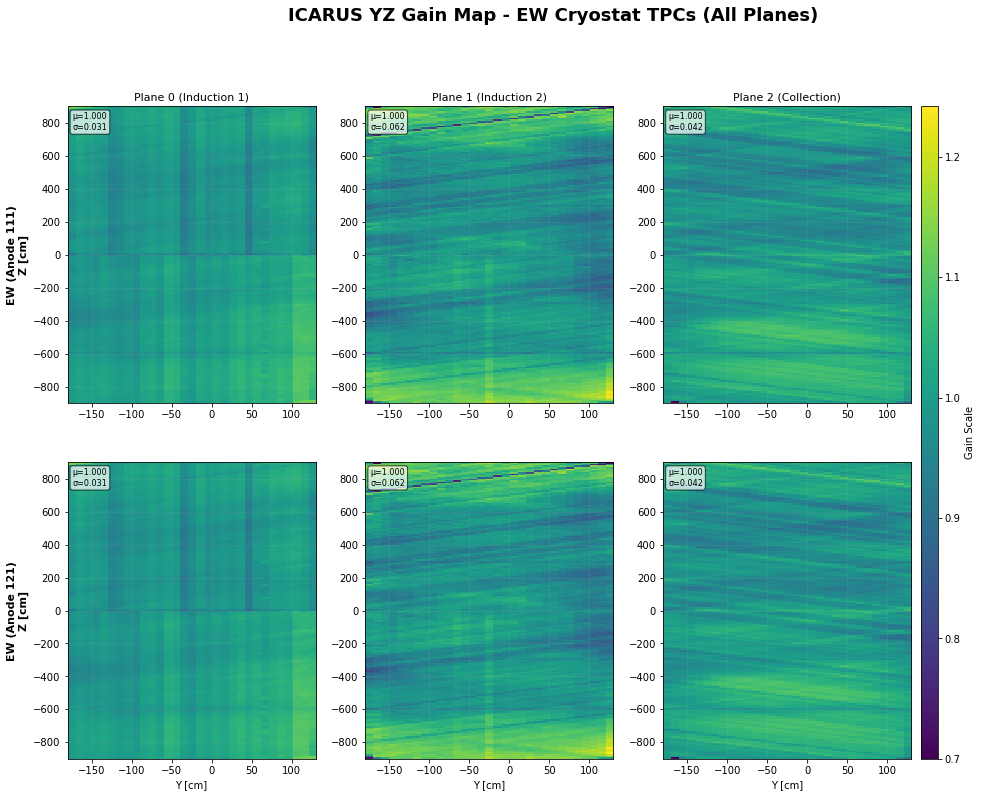

In [97]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Read the JSON file
with open('/cvmfs/icarus.opensciencegrid.org/products/icarus/icarus_data/v10_06_02/icarus_data/WirecellData/yzmap_gain_icarus_v4_run2.json', 'r') as f:
    data = json.load(f)

# Configuration
bin_width = 10.0   # cm
bin_height = 10.0  # cm
y_offset = 180.0   # cm
z_offset = 900.0   # cm

# EE TPC modules
anodes_ee = ['AnodePlane:anode111', 'AnodePlane:anode121']
tpc_names = ['EW (Anode 111)', 'EW (Anode 121)']
plane_names = ['0 (Induction 1)', '1 (Induction 2)', '2 (Collection)']

# Create 2x3 subplot grid (2 TPCs × 3 planes)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Find common color scale
all_gains = []
for anode_name in anodes_ee:
    if anode_name in data: 
        for plane in ['0', '1', '2']: 
            if plane in data[anode_name]:
                gain_map = np.array(data[anode_name][plane])
                all_gains.append(gain_map)

if all_gains:
    vmin = np.min([g.min() for g in all_gains])
    vmax = np.max([g.max() for g in all_gains])
else:
    vmin, vmax = 0.9, 1.1

print(data.keys())

# Plot each TPC and plane
for row, (anode_name, tpc_name) in enumerate(zip(anodes_ee, tpc_names)):
    for col, plane in enumerate(['0', '1', '2']):
        ax = axes[row, col]
        
        if anode_name not in data or plane not in data[anode_name]:
            print(anode_name, plane)
            print(anode_name in data)
            ax.text(0.5, 0.5, 'No data', 
                    ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{tpc_name}\nPlane {plane_names[col]}')
            continue
        
        # Get the gain map
        gain_map = np.array(data[anode_name][plane])
        n_rows, n_cols = gain_map.shape
        
        # Calculate ranges
        y_min = -y_offset
        y_max = y_min + n_cols * bin_width
        z_min = -z_offset
        z_max = z_min + n_rows * bin_height
        
        # Plot
        im = ax.imshow(gain_map, 
                       extent=[y_min, y_max, z_min, z_max],
                       origin='lower',
                       aspect='auto',
                       cmap='viridis',
                       vmin=vmin, 
                       vmax=vmax,
                       interpolation='nearest')
        
        # Labels
        if col == 0:
            ax.set_ylabel(f'{tpc_name}\nZ [cm]', fontsize=11, fontweight='bold')
        if row == 1:
            ax.set_xlabel('Y [cm]', fontsize=10)
        if row == 0: 
            ax.set_title(f'Plane {plane_names[col]}', fontsize=11)
        
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
        
        # Add text with stats
        stats_text = f'μ={gain_map.mean():.3f}\nσ={gain_map. std():.3f}'
        ax.text(0.02, 0.98, stats_text, 
                transform=ax.transAxes, 
                fontsize=8, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add shared colorbar
cbar = fig. colorbar(im, ax=axes, label='Gain Scale', pad=0.01, aspect=40)

# Overall title
fig. suptitle('ICARUS YZ Gain Map - EW Cryostat TPCs (All Planes)', 
             fontsize=18, fontweight='bold', y=0.995)

#plt.tight_layout()
# Reserve space for the suptitle and include figure-level artists in the tight bbox
#fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(
    '/nashome/m/micarrig/icarus/showerCal/v10_06_00_04p02/yzmap_EW_cryostat_all_planes.pdf',
    dpi=300,
    bbox_inches='tight',
    bbox_extra_artists=[fig._suptitle, cbar.ax],
    pad_inches=0.1,
)
plt.show()



dict_keys(['AnodePlane:anode110', 'AnodePlane:anode120', 'AnodePlane:anode111', 'AnodePlane:anode121', 'AnodePlane:anode112', 'AnodePlane:anode122', 'AnodePlane:anode113', 'AnodePlane:anode123'])


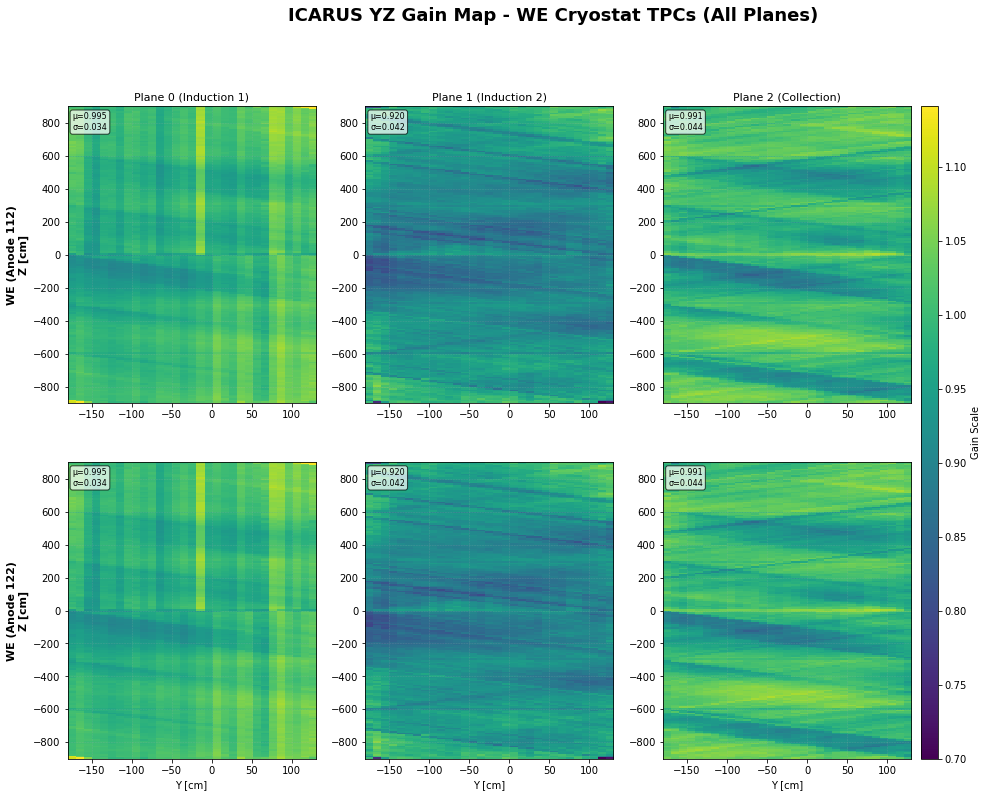

In [99]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Read the JSON file
with open('/cvmfs/icarus.opensciencegrid.org/products/icarus/icarus_data/v10_06_02/icarus_data/WirecellData/yzmap_gain_icarus_v4_run2.json', 'r') as f:
    data = json.load(f)

# Configuration
bin_width = 10.0   # cm
bin_height = 10.0  # cm
y_offset = 180.0   # cm
z_offset = 900.0   # cm

# EE TPC modules
anodes_ee = ['AnodePlane:anode112', 'AnodePlane:anode122']
tpc_names = ['WE (Anode 112)', 'WE (Anode 122)']
plane_names = ['0 (Induction 1)', '1 (Induction 2)', '2 (Collection)']

# Create 2x3 subplot grid (2 TPCs × 3 planes)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Find common color scale
all_gains = []
for anode_name in anodes_ee:
    if anode_name in data: 
        for plane in ['0', '1', '2']: 
            if plane in data[anode_name]:
                gain_map = np.array(data[anode_name][plane])
                all_gains.append(gain_map)

if all_gains:
    vmin = np.min([g.min() for g in all_gains])
    vmax = np.max([g.max() for g in all_gains])
else:
    vmin, vmax = 0.9, 1.1

print(data.keys())

# Plot each TPC and plane
for row, (anode_name, tpc_name) in enumerate(zip(anodes_ee, tpc_names)):
    for col, plane in enumerate(['0', '1', '2']):
        ax = axes[row, col]
        
        if anode_name not in data or plane not in data[anode_name]:
            print(anode_name, plane)
            print(anode_name in data)
            ax.text(0.5, 0.5, 'No data', 
                    ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{tpc_name}\nPlane {plane_names[col]}')
            continue
        
        # Get the gain map
        gain_map = np.array(data[anode_name][plane])
        n_rows, n_cols = gain_map.shape
        
        # Calculate ranges
        y_min = -y_offset
        y_max = y_min + n_cols * bin_width
        z_min = -z_offset
        z_max = z_min + n_rows * bin_height
        
        # Plot
        im = ax.imshow(gain_map, 
                       extent=[y_min, y_max, z_min, z_max],
                       origin='lower',
                       aspect='auto',
                       cmap='viridis',
                       vmin=vmin, 
                       vmax=vmax,
                       interpolation='nearest')
        
        # Labels
        if col == 0:
            ax.set_ylabel(f'{tpc_name}\nZ [cm]', fontsize=11, fontweight='bold')
        if row == 1:
            ax.set_xlabel('Y [cm]', fontsize=10)
        if row == 0: 
            ax.set_title(f'Plane {plane_names[col]}', fontsize=11)
        
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
        
        # Add text with stats
        stats_text = f'μ={gain_map.mean():.3f}\nσ={gain_map. std():.3f}'
        ax.text(0.02, 0.98, stats_text, 
                transform=ax.transAxes, 
                fontsize=8, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add shared colorbar
cbar = fig. colorbar(im, ax=axes, label='Gain Scale', pad=0.01, aspect=40)

# Overall title
fig. suptitle('ICARUS YZ Gain Map - WE Cryostat TPCs (All Planes)', 
             fontsize=18, fontweight='bold', y=0.995)

#plt.tight_layout()
# Reserve space for the suptitle and include figure-level artists in the tight bbox
#fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(
    '/nashome/m/micarrig/icarus/showerCal/v10_06_00_04p02/yzmap_WE_cryostat_all_planes.pdf',
    dpi=300,
    bbox_inches='tight',
    bbox_extra_artists=[fig._suptitle, cbar.ax],
    pad_inches=0.1,
)
plt.show()



dict_keys(['AnodePlane:anode110', 'AnodePlane:anode120', 'AnodePlane:anode111', 'AnodePlane:anode121', 'AnodePlane:anode112', 'AnodePlane:anode122', 'AnodePlane:anode113', 'AnodePlane:anode123'])


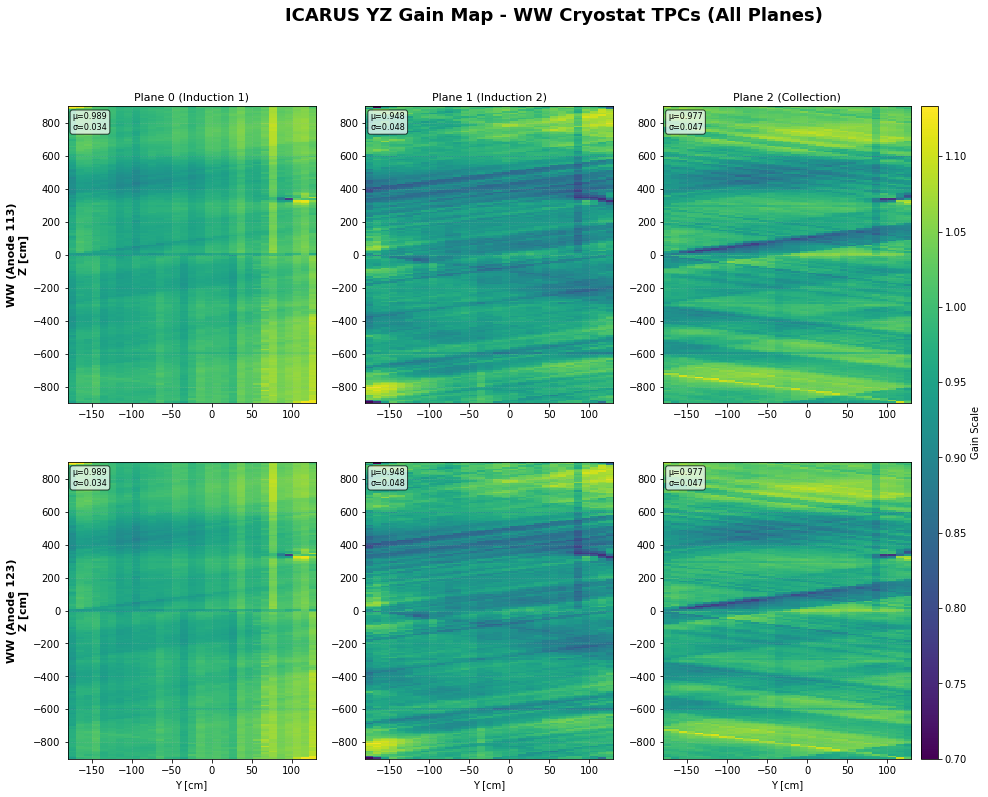

In [105]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Read the JSON file
with open('/cvmfs/icarus.opensciencegrid.org/products/icarus/icarus_data/v10_06_02/icarus_data/WirecellData/yzmap_gain_icarus_v4_run2.json', 'r') as f:
    data = json.load(f)

# Configuration
bin_width = 10.0   # cm
bin_height = 10.0  # cm
y_offset = 180.0   # cm
z_offset = 900.0   # cm

# EE TPC modules
anodes_ee = ['AnodePlane:anode113', 'AnodePlane:anode123']
tpc_names = ['WW (Anode 113)', 'WW (Anode 123)']
plane_names = ['0 (Induction 1)', '1 (Induction 2)', '2 (Collection)']

# Create 2x3 subplot grid (2 TPCs × 3 planes)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Find common color scale
all_gains = []
for anode_name in anodes_ee:
    if anode_name in data: 
        for plane in ['0', '1', '2']: 
            if plane in data[anode_name]:
                gain_map = np.array(data[anode_name][plane])
                all_gains.append(gain_map)

if all_gains:
    vmin = np.min([g.min() for g in all_gains])
    vmax = np.max([g.max() for g in all_gains])
else:
    vmin, vmax = 0.9, 1.1

print(data.keys())

# Plot each TPC and plane
for row, (anode_name, tpc_name) in enumerate(zip(anodes_ee, tpc_names)):
    for col, plane in enumerate(['0', '1', '2']):
        ax = axes[row, col]
        
        if anode_name not in data or plane not in data[anode_name]:
            print(anode_name, plane)
            print(anode_name in data)
            ax.text(0.5, 0.5, 'No data', 
                    ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{tpc_name}\nPlane {plane_names[col]}')
            continue
        
        # Get the gain map
        gain_map = np.array(data[anode_name][plane])
        n_rows, n_cols = gain_map.shape
        
        # Calculate ranges
        y_min = -y_offset
        y_max = y_min + n_cols * bin_width
        z_min = -z_offset
        z_max = z_min + n_rows * bin_height
        
        # Plot
        im = ax.imshow(gain_map, 
                       extent=[y_min, y_max, z_min, z_max],
                       origin='lower',
                       aspect='auto',
                       cmap='viridis',
                       vmin=vmin, 
                       vmax=vmax,
                       interpolation='nearest')
        
        # Labels
        if col == 0:
            ax.set_ylabel(f'{tpc_name}\nZ [cm]', fontsize=11, fontweight='bold')
        if row == 1:
            ax.set_xlabel('Y [cm]', fontsize=10)
        if row == 0: 
            ax.set_title(f'Plane {plane_names[col]}', fontsize=11)
        
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
        
        # Add text with stats
        stats_text = f'μ={gain_map.mean():.3f}\nσ={gain_map. std():.3f}'
        ax.text(0.02, 0.98, stats_text, 
                transform=ax.transAxes, 
                fontsize=8, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add shared colorbar
cbar = fig. colorbar(im, ax=axes, label='Gain Scale', pad=0.01, aspect=40)

# Overall title
fig. suptitle('ICARUS YZ Gain Map - WW Cryostat TPCs (All Planes)', 
             fontsize=18, fontweight='bold', y=0.995)

#plt.tight_layout()
# Reserve space for the suptitle and include figure-level artists in the tight bbox
#fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(
    '/nashome/m/micarrig/icarus/showerCal/v10_06_00_04p02/yzmap_WW_cryostat_all_planes.pdf',
    dpi=300,
    bbox_inches='tight',
    bbox_extra_artists=[fig._suptitle, cbar.ax],
    pad_inches=0.1,
)
plt.show()

